In [21]:
import scvelo as scv
import loompy
import velocyto as vcy
import pandas as pd
import scanpy as sc
scv.logging.print_version()
print(loompy.__version__)

Running scvelo 0.2.4 (python 3.9.6) on 2022-05-18 23:47.
3.0.7


In [22]:
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True # set max width size for presenter view
scv.set_figure_params('scvelo') # for beautified visualization

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI's XMLRPC API is currently disabled due to unmanageable load and will be deprecated in the near future. See https://status.python.org/ for more information.


# Load data
- Day 0

In [5]:
day0 = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/BarcodeOutputs/2022_02/Cellranger_count_output/2022_04_day0_onlyRNA/velocyto/2022_04_day0_onlyRNA.loom",
                     validate=False)

In [6]:
day0

AnnData object with n_obs × n_vars = 9520 × 32738
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [8]:
clust = ["day0" for x in range(day0.shape[0])]
clust = pd.Categorical(clust)
day0.obs['clusters'] = clust

In [9]:
day0.write_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_day0_onlyRNA_labeled.loom")

- Day 10 CIS

In [10]:
day10_cis = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/BarcodeOutputs/2022_02/Cellranger_count_output/2022_04_day10_CIS_onlyRNA/velocyto/2022_04_day10_CIS_onlyRNA.loom",
                          validate=False)

In [12]:
day10_cis

AnnData object with n_obs × n_vars = 11326 × 32738
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [13]:
clust = ["day10_cis" for x in range(day10_cis.shape[0])]
clust = pd.Categorical(clust)
day10_cis.obs['clusters'] = clust

In [14]:
day10_cis

AnnData object with n_obs × n_vars = 11326 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [15]:
day10_cis.write_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_day10_CIS_onlyRNA_labeled.loom")

- Week 5 CIS

In [29]:
week5_cis = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/BarcodeOutputs/2022_02/Cellranger_count_output/2022_04_week5_CIS_onlyRNA/velocyto/2022_04_week5_CIS_onlyRNA.loom",
                          validate=False)

In [30]:
week5_cis

AnnData object with n_obs × n_vars = 9479 × 32738
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [31]:
clust = ["week5_cis" for x in range(week5_cis.shape[0])]
clust = pd.Categorical(clust)
week5_cis.obs['clusters'] = clust

In [32]:
week5_cis

AnnData object with n_obs × n_vars = 9479 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [33]:
week5_cis.write_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_week5_CIS_onlyRNA_labeled.loom")

- Combine datasets

In [34]:
loompy.combine(["/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_day0_onlyRNA_labeled.loom",
                "/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_day10_CIS_onlyRNA_labeled.loom",
                "/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_week5_CIS_onlyRNA_labeled.loom"],
                "/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_CIS_onlyRNA_labeled.loom", key="Accession")

In [23]:
adata = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_CIS_onlyRNA_labeled.loom")

In [24]:
adata

AnnData object with n_obs × n_vars = 30325 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [25]:
adata.obs['clusters'] = pd.Categorical(adata.obs['clusters'])

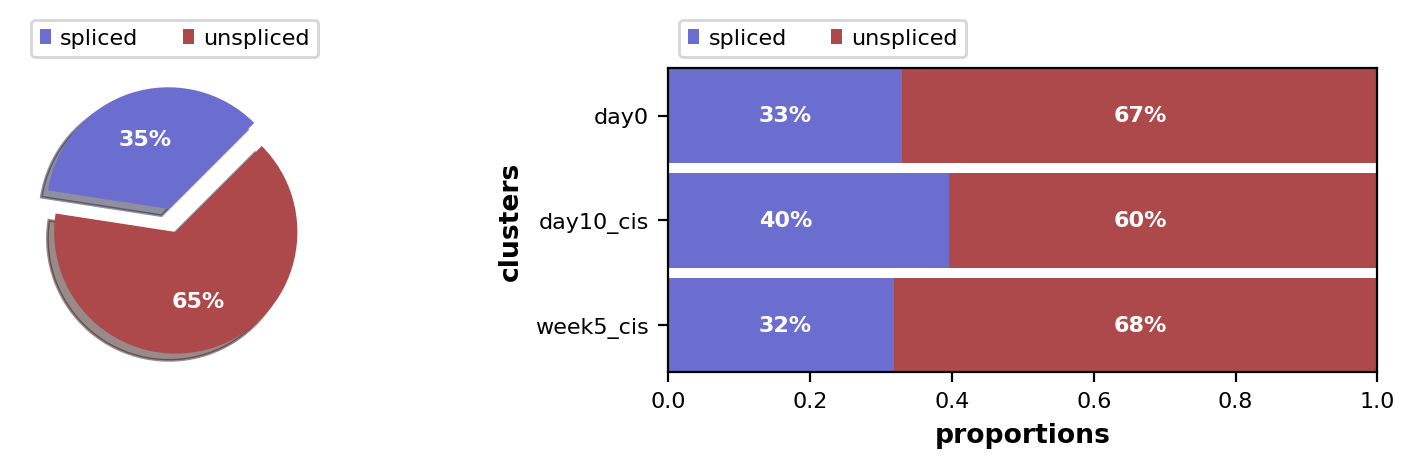

In [26]:
scv.pl.proportions(adata)

# Start scVelo analysis

In [27]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 30940 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:17) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:12) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [28]:
adata

AnnData object with n_obs × n_vars = 30325 × 1798
    obs: 'Clusters', '_X', '_Y', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [29]:
sc.tl.pca(adata, svd_solver='arpack')

In [30]:
sc.tl.umap(adata)

In [31]:
adata

AnnData object with n_obs × n_vars = 30325 × 1798
    obs: 'Clusters', '_X', '_Y', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [32]:
sc.tl.leiden(adata)

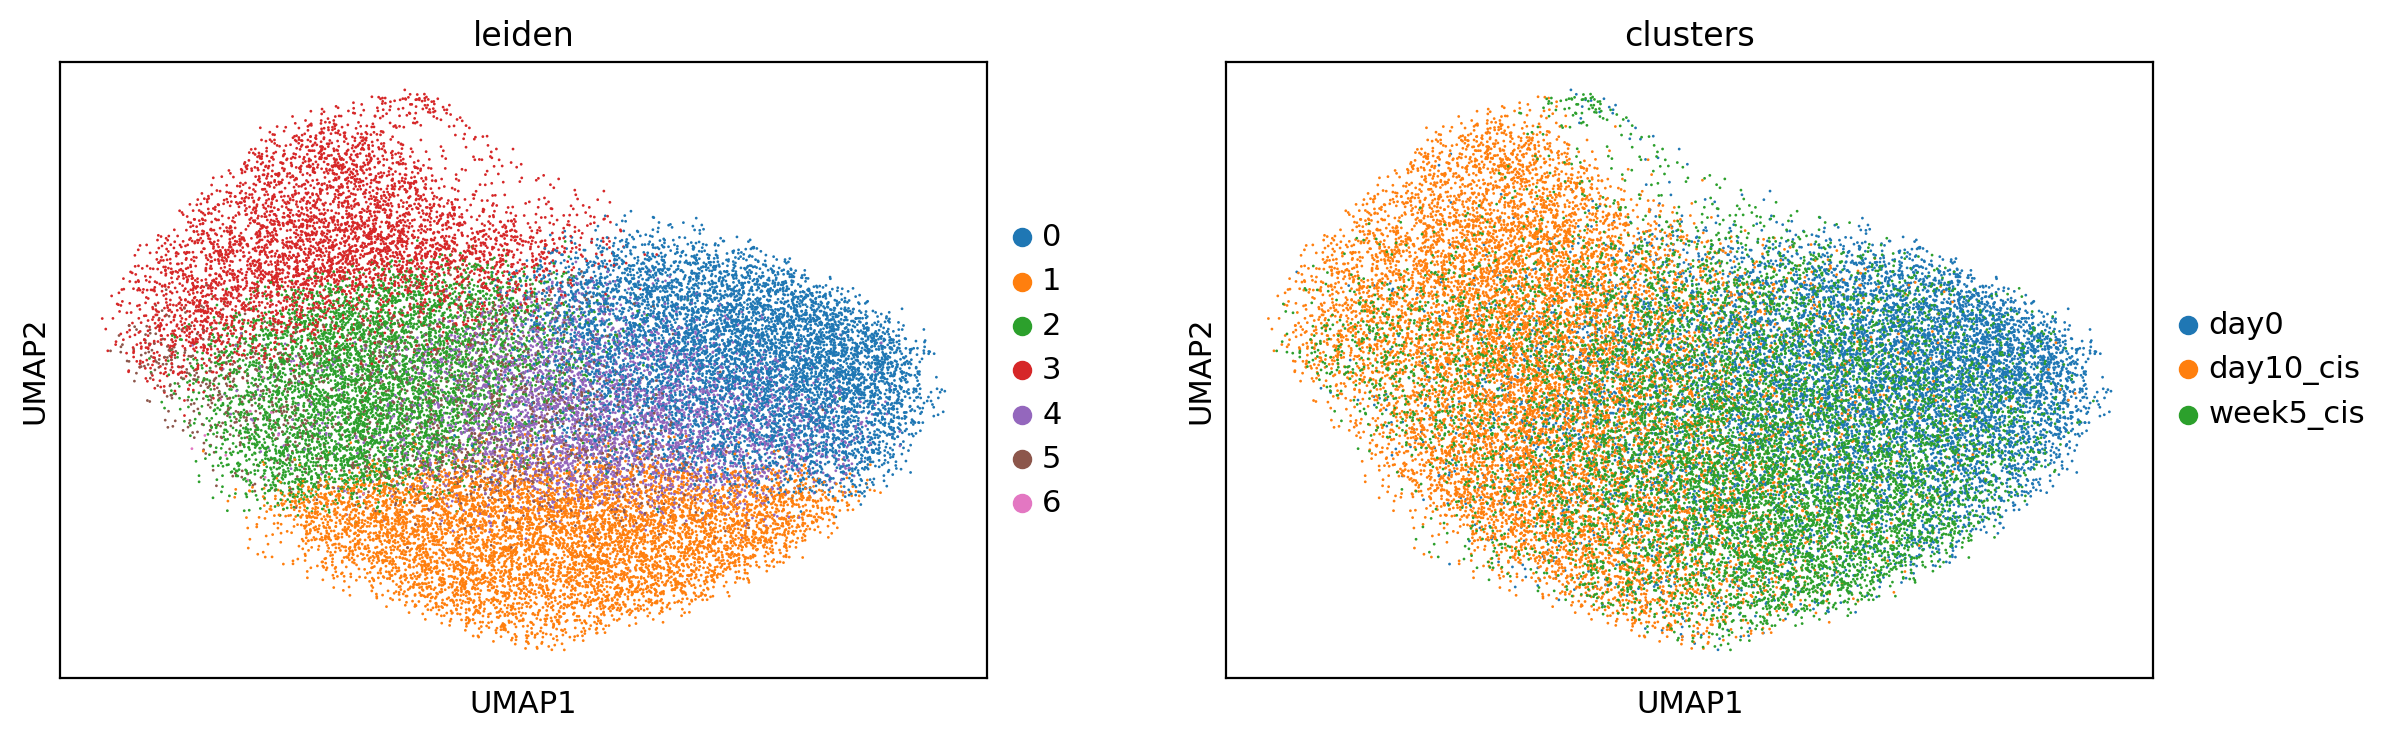

In [33]:
sc.pl.umap(adata, color=['leiden','clusters'])

In [34]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:11) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/30325 [00:00<?, ?cells/s]

    finished (0:00:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:24) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


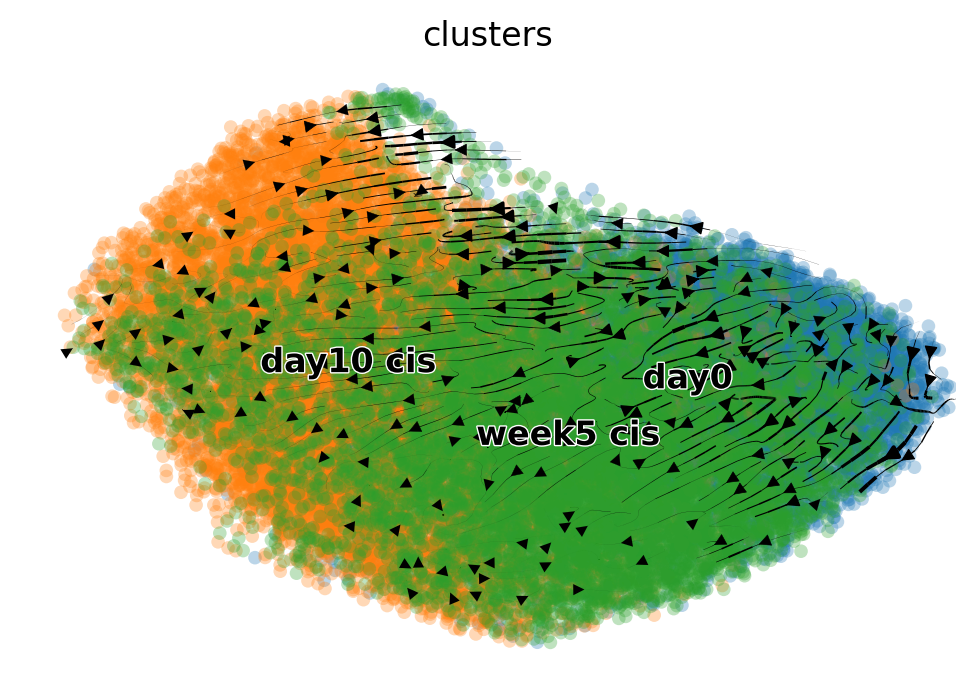

In [35]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

computing terminal states
    identified 2 regions of root cells and 0 region of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


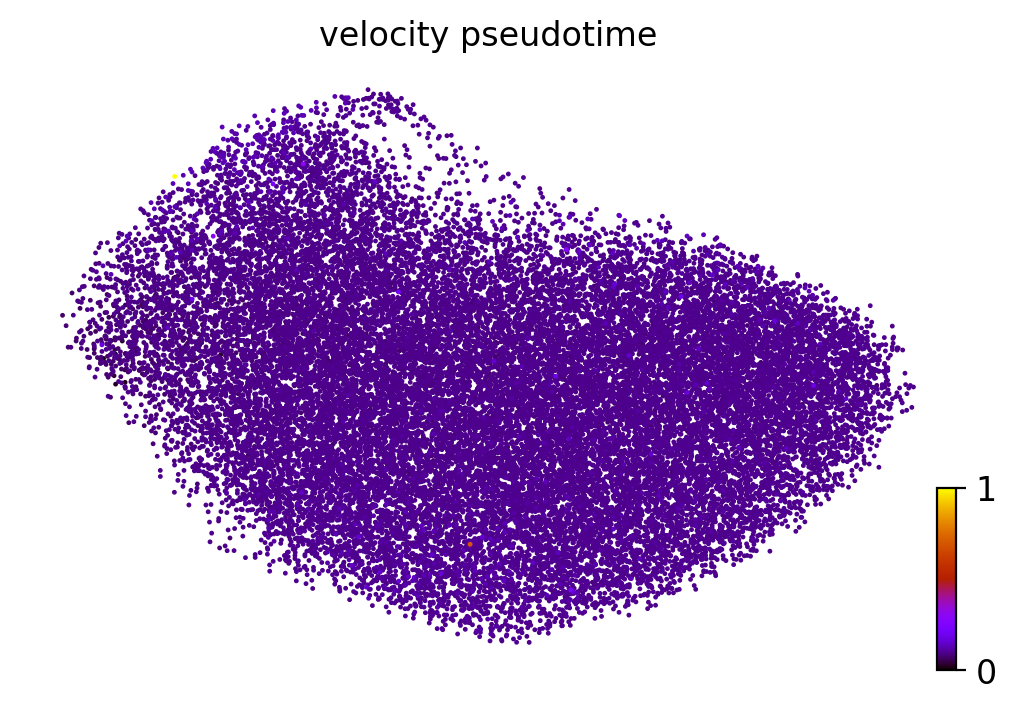

In [36]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [40]:
adata

AnnData object with n_obs × n_vars = 30325 × 1798
    obs: 'Clusters', '_X', '_Y', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'leiden', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'clusters_colors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'recover_dynamics'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity

In [20]:
adata.write_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_week5_CIS_scvelo.loom", write_obsm_varm=True)

In [43]:
adata = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_week5_CIS_scvelo.loom")

In [46]:
adata

AnnData object with n_obs × n_vars = 30325 × 1798
    obs: 'Clusters', '_X', '_Y', 'clusters', 'end_points', 'initial_size', 'initial_size_spliced', 'initial_size_unspliced', 'leiden', 'n_counts', 'root_cells', 'velocity_pseudotime', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_genes', 'velocity_qreg_ratio', 'velocity_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling'
    uns: 'recover_dynamics'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'matrix', 'Ms', 'Mu', 'ambiguous', 'spliced', 'unspliced', 'variance_velocity', 'velocity', 'fit_t', 'fit_tau', 'fit_tau_'

In [47]:
adata.var["velocity_genes"]

Gene
GNB1        0
C1orf222    0
CHD5        0
TNFRSF25    0
PLEKHG5     0
           ..
ZCCHC18     0
PLXNA3      0
IKBKG       0
VBP1        0
IL9R        0
Name: velocity_genes, Length: 1798, dtype: uint8

In [44]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/16 cores)
    finished (0:00:04) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)

outputs model fit of gene: C1orf222


In [45]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities


AttributeError: 'NoneType' object has no attribute 'dot'